### Optimal Crowdsourcing Contest Simulated as All-Pay Auctions

In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def genPlayers(numPlayers):
    """ Function that generates n samples over a uniform distribution, each sample serves as a player's private valuation
    Args:
        numPlayers: number of samples/players to generate
    Returns:
        numpy array of length numPlayers
    """
    return np.random.uniform(size=numPlayers)

In [20]:
def bidsFromValue(values, numPlayers):
    """ Function returning bid value given numPlayers i.i.d sampling from uniform distribution, and minimum bid reserve
    Args:
        values: numpy array of players' private valuations
        numPlayers: number of players
    Returns:
        list of float
    """
    bids = []
    # reserve = 1/(numPlayers+1)  # Optimal bid reserve is monopoly price
    for v in values:
        
        bid = ((numPlayers -1)/numPlayers) * math.pow(v, numPlayers)
        bids.append(bid)
    return bids

In [21]:
def allPayAuction(numPlayers):
    """ Function simulating an all-pay auction
    Args:
        numPlayers: number of players in the auction
    Returns:
        
    """
    playerVals = genPlayers(numPlayers)
    playerBids = bidsFromValue(playerVals, numPlayers)
    winnerIndex = playerBids.index(max(playerBids))
    winnerBid = playerBids[winnerIndex]
    sumOfLosers = 0
    
    for i in range(len(playerBids)):
        if (i != winnerIndex):
            sumOfLosers += playerBids[i]
    return winnerBid, sumOfLosers

In [29]:
iterations = 5000
totPlayers = [2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
ratio = []

for numPlayers in totPlayers:
    winCtr = 0
    for i in range(iterations):
        W, L = allPayAuction(numPlayers)
        if (W > L):
            winCtr += 1
    winCtr /= iterations
    ratio.append(winCtr)

In [30]:
ratio

[1.0, 0.7582, 0.6702, 0.6062, 0.5772, 0.5684, 0.5792, 0.5498, 0.559, 0.5652]

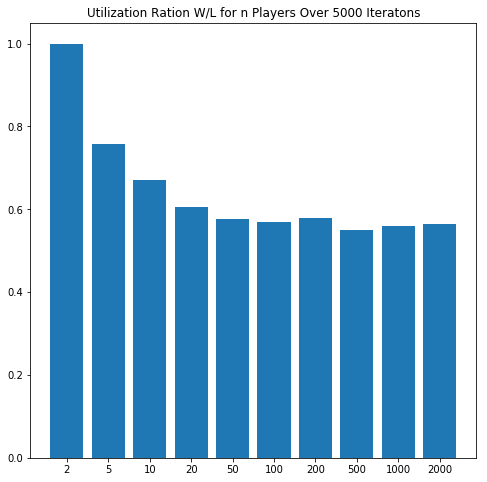

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(111)
xAxis = [str(x) for x in totPlayers]
plt.bar(xAxis, ratio)
plt.title('Utilization Ration W/L for n Players Over 5000 Iteratons')
plt.show()